## Formal Simulated Inference
1. Define F (i.e. your model and assumptions)
2. Formalize test
3. Describe test statistic
4. 
  1. Sample data from F \in \mathscr{F}_0
  2. Sample data from F \in \mathscr{F}_A
5. 
  1. Plot power vs n (i.e. perspective power analysis)
  2. Plot power vs n (i.e. perspective power analysis)
6. Apply to data
 
### Step 1: Define model and assumptions
X_i, Y_i \sim F_{XY} \in \mathscr{F}
x_i \in \mathbb{R}  (height)
y_i \in {0,1}    (sex)

Recall the law of total probability: F_{XY} = F_{X|Y}F_Y. Now, with multiple classes,

F_{XY} = F_{X|Y=0}F_{Y=0} + F_{X|Y=1}F_{Y=1}
F_{Y=0} = Bern(\pi)

F_{X|0} = \mathscr{N}(\mu_0, \sigma_0^2)
F_{X|!} = \mathscr{N}(\mu_1, \sigma_1^2)

### Step 2: Formalize test
H_0: \mu_0 = \mu_1 && \sigma_0 = \sigma_1 <br/> \to || \mu_0 - \mu_1 || < \delta
H_A: \mu_0 != \mu_1  || \sigma_0 != \sigma_1

**OR**

H_0: \mu_0 = \mu_1 <br/>
H_A: \mu_0 != \mu_1

\alpha, the critical value, indicates the power of your null distribution under your test as n \to \infty

### Step 3: Describe test statistic
From sample, estimate || \hat{\mu_0} - \hat{\mu_1} || = \hat{delta}.

Then, we estimate the distribution of \hat{delta} under this test statistic, and reject null if \hat{delta} is in the tails of the distribution.

### Intermediate Step

In [31]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

np.random.seed(123456789)  # for reproducibility, set random seed
alpha = 0.05  # define alpha
r = 20  # define number of rois
N = 100 # number of samples at each iteration

# define number of subjects per class
S = np.array((4, 6, 8, 10, 14, 18, 20, 26, 30, 40,
              50, 60, 70, 80, 100, 120, 150, 200, 250,
              300, 400, 500, 750, 1000, 1500, 2000,
              3000, 5000))

###  Step 4A:  Sample data from null

In [32]:
pow_null = np.array((), dtype=np.dtype('float64'))
# compute this statistic for various sizes of datasets
for s in S:
    s0 = s/2
    s1 = s - s0

    # compute this many times for each operating point to get average
    p = np.array((), dtype=np.dtype('float64'))    
    for _ in itertools.repeat(None,N):
        g0 = 1 * (np.random.rand( r, r, s0) > 0.5) # (null), 0.52 (classes)
        g1 = 1 * (np.random.rand( r, r, s1) > 0.5) # (null), 0.48 (classes)

        # compute feature of data
        mbar0 = np.sum(g0, axis=(0,1))
        mbar1 = np.sum(g1, axis=(0,1))

        # compute t-test on feature
        p = np.append(p, stats.wilcoxon(mbar0, mbar1)[1])
    
    # record average p value at operating point
    pow_null = np.append(pow_null, np.sum(1.0*(p < alpha))/N)

###  Step 4B:  Sample data from alternate

In [33]:
pow_alt = np.array((), dtype=np.dtype('float64'))
# compute this statistic for various sizes of datasets
for s in S:
    s0 = s/2
    s1 = s - s0

    # compute this many times for each operating point to get average
    p = np.array((), dtype=np.dtype('float64'))    
    for _ in itertools.repeat(None,N):
        g0 = 1 * (np.random.rand( r, r, s0) > 0.52) # (null), 0.52 (classes)
        g1 = 1 * (np.random.rand( r, r, s1) > 0.48) # (null), 0.48 (classes)

        # compute feature of data
        mbar0 = np.sum(g0, axis=(0,1))
        mbar1 = np.sum(g1, axis=(0,1))

        # compute t-test on feature
        p = np.append(p, stats.wilcoxon(mbar0, mbar1)[1])
    
    # record average p value at operating point
    pow_alt = np.append(pow_alt, np.sum(1.0*(p < alpha))/N)

### Step 5: Plot power vs n on null set

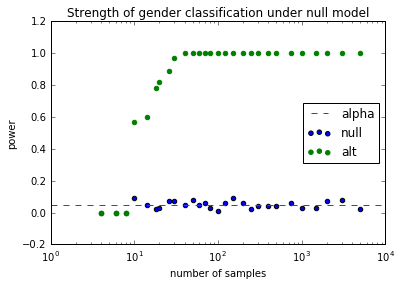

In [34]:
plt.scatter(S, pow_null, hold=True, label='null')
plt.scatter(S, pow_alt, color='green', hold=True, label='alt')
plt.xscale('log')
plt.xlabel('number of samples')
plt.ylabel('power')
plt.title('Strength of gender classification under null model')
plt.axhline(alpha, color='red', linestyle='--', label='alpha')
plt.legend(loc=5)
plt.show()

### [old] Step 1: Define formal test
We sample graphs from \mathscr{F}<sub>G,Y</sub> = { F<sub>G,Y</sub>(\cdot; \theta) : \theta \in \Theta }. Since, all samples observed are graph matched (i.e. nodes are equal across graphs), we can look at just the distribution of adjacency matrices: F<sub>G,Y</sub> = F<sub>A,Y</sub>

Assuming all edges are ~iid Bernoulli, F<sub>A,Y</sub> = \prod<sub>u,v \in \mathscr{E}</sub> F<sub>A<sub>uv</sub>,Y</sub>, where \mathscr{E} \subset V x V is the set of edges in the graph.

If there is an inter-class difference between the populations, F<sub>A,1</sub> \noteq F<sub>A,0</sub>.

We observe a feature of the graphs, \bar{x<sub>i</sub>}, which indicates the sum of edges in the graphs, which will be used to classify the graphs. If the mentioned interclass difference exists, then \bar{x<sub>1</sub>} \noteq \bar{x<sub>0</sub>}.

The null hypothesis, that subjects are from the same distribution regardless from class, and the alternate, that a class difference exist, can be then written as follows:

H<sub>0</sub>: F<sub>A,1</sub> = F<sub>A,0</sub> <br/>
H<sub>A</sub>: F<sub>A,1</sub> \noteq F<sub>A,0</sub> <br/>